<type 'numpy.ndarray'>
<type 'numpy.float64'>
<type 'numpy.ndarray'>
<type 'numpy.float64'>
<type 'numpy.ndarray'>
<type 'numpy.float64'>
(257,)
(257,)


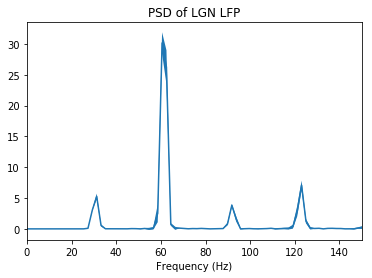

In [122]:
import os
import pdb
import numpy as np
import linecache
import matplotlib.pyplot as plt
from matplotlib.mlab import psd

def extract_lfp_and_time(sim_file):
    lgn_line = linecache.getline(sim_file, 1)
    lgn_lfp = np.array(map(float, lgn_line.split()))
    time_line = linecache.getline(sim_file, 5)
    time = np.array(map(float, time_line.split()))
    print type(lgn_lfp)
    print type(lgn_lfp[0])
    return (time, lgn_lfp)

sim_time = 500e-3
path = '/home/homerobse/lgn-v1/data_files'
fname_prefix = '2018-04-02 00:39:27.361073_'
fname_con = '[0, 3e-05, 3e-05, 3e-05]_sim-'
nsims = 3
dt = 0.025e-3
nsamples = int(sim_time/dt/40)  # only stored every 40th data point
Fs = 1/dt/40  # only stored every 40th data point
# Fs = 1/2.5e-05
nfft = int(sim_time/dt/40)  # only stored every 40th data point
zero_padding = int(1<<(nfft-1).bit_length())  # zero padding to be a power of 2

sim_file = os.path.join(path, fname)
lgn_pows = np.empty((nsims, 257))
for nsim in np.arange(nsims):
    sim_file = os.path.join(path, fname_prefix + fname_con + str(nsim) + '.txt')
    (time, lgn_lfp) = extract_lfp_and_time(sim_file)
    (lgn_pows[nsim, :], freqpsd) = psd(lgn_lfp, nfft, Fs, pad_to=zero_padding)  # args are signal, nfft, Fs

sem = np.std(lgn_pows, axis=0)/nsims**0.5
# plt.figure(1)
# plt.plot(time, lgn_lfps[0,:])
# plt.title('LGN LFP')
# plt.xlabel('Time (ms)')

plt.figure(2)
plt.plot(freqpsd, Pxx)
print np.shape(sem)
print np.shape(Pxx)
plt.fill_between(freqpsd, Pxx-sem, Pxx+sem)
plt.xlim([0, 150])
plt.title('PSD of LGN LFP')
plt.xlabel('Frequency (Hz)')

plt.show()